In [6]:
import os
import shutil
import random
from pathlib import Path
from tqdm import tqdm

# Set random seed for reproducibility
random.seed(42)

# Define source and destination directories
src_img_dir = os.path.join(os.getcwd(), '../data', 'kaggle-wood-defects', 'images')
src_label_dir = os.path.join(os.getcwd(), '../data', 'kaggle-wood-defects', 'labels-yolo')
dataset_root = os.path.join(os.getcwd(), '../data', 'wood-defects-parsed')

# Create destination directories
splits = ['train', 'val', 'test']
for split in splits:
    os.makedirs(f'{dataset_root}/images/{split}', exist_ok=True)
    os.makedirs(f'{dataset_root}/labels/{split}', exist_ok=True)

# Get all image files
image_files = [f for f in os.listdir(src_img_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]


In [7]:

# Shuffle the files
random.shuffle(image_files)

# Calculate split sizes (70% train, 20% val, 10% test)
total = len(image_files)
train_size = int(0.7 * total)
val_size = int(0.1 * total)

# Split the files
train_files = image_files[:train_size]
val_files = image_files[train_size:train_size + val_size]
test_files = image_files[train_size + val_size:]

# Function to copy files for a split
def copy_files(files, split):
    for f in tqdm(files):
        # Copy image
        src_img = os.path.join(src_img_dir, f)
        dst_img = os.path.join(dataset_root, 'images', split, f)
        shutil.copy2(src_img, dst_img)
        
        # Copy corresponding label file
        label_file = os.path.splitext(f)[0] + '.txt'
        src_label = os.path.join(src_label_dir, label_file)
        dst_label = os.path.join(dataset_root, 'labels', split, label_file)
        if os.path.exists(src_label):
            shutil.copy2(src_label, dst_label)

# Copy files for each split
copy_files(train_files, 'train')
copy_files(val_files, 'val')
copy_files(test_files, 'test')

print(f"Dataset split complete:")
print(f"Train: {len(train_files)} images")
print(f"Val: {len(val_files)} images")
print(f"Test: {len(test_files)} images")


100%|██████████| 800/800 [00:01<00:00, 623.99it/s]

Dataset split complete:
Train: 2800 images
Val: 400 images
Test: 800 images


In [15]:
# Get all label files
label_files = [f for f in os.listdir(src_label_dir) if f.endswith('.txt')]

# Dictionary to store class examples
class_examples = {}

# Go through label files to find examples of each class
for label_file in label_files:
    with open(os.path.join(src_label_dir, label_file), 'r') as f:
        for line in f:
            class_num = int(line.split()[0])
            if class_num not in class_examples:
                # Store the image name for this class
                class_examples[class_num] = os.path.splitext(label_file)[0] + '.jpg'
                break

# Print examples for each class
print("\nExample images for each class:")
for class_num in sorted(class_examples.keys()):
    print(f"Class {class_num}: {class_examples[class_num]}")



Example images for each class:
Class 0: 109200055.jpg
Class 1: 105900022.jpg
Class 2: 112500070.jpg
Class 3: 103500057.jpg
Class 4: 103400043.jpg
Class 5: 100000082.jpg
Class 6: 99100063.jpg
Class 7: 111200009.jpg


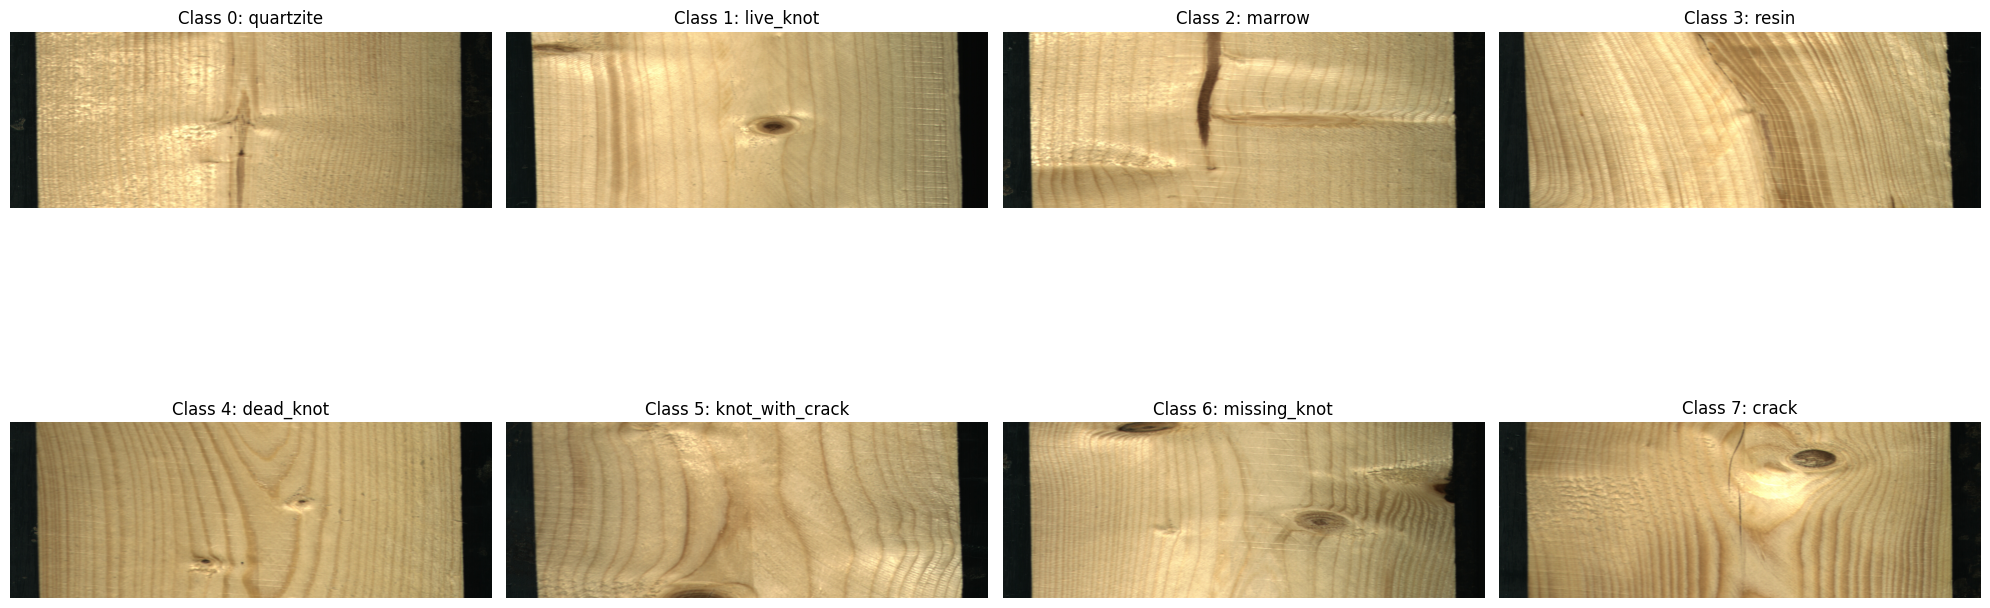

In [32]:
import matplotlib.pyplot as plt
import cv2
from PIL import Image

class WoodDefectVisualizer:
    def __init__(self):
        self.class_names = {
            0: 'quartzite',
            1: 'live_knot',
            2: 'marrow',
            3: 'resin', 
            5: 'knot_with_crack',
            6: 'missing_knot',
            7: 'crack'
        }

    def load_image(self, img_path):
        img = cv2.imread(img_path)
        return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    def plot_examples(self, class_examples, src_img_dir):
        num_classes = len(class_examples)
        fig, axes = plt.subplots(2, 4, figsize=(20, 10))
        axes = axes.ravel()

        for class_num in sorted(class_examples.keys()):
            img_path = os.path.join(src_img_dir, class_examples[class_num])
            img = self.load_image(img_path)
            class_name = self.class_names[class_num]
            
            axes[class_num].imshow(img)
            axes[class_num].set_title(f'Class {class_num}: {class_name}')
            axes[class_num].axis('off')

        plt.tight_layout()
        plt.show()

# Create visualizer and plot examples
visualizer = WoodDefectVisualizer()
visualizer.plot_examples(class_examples, src_img_dir)
